### Power User Curve

The power user curve is a way to understand the engagement of users with your product. It's basically a 30-day
histogram that graphs user engagement by the total number of days per month they were active.

We are provided with a Worksheet containing the device IDs of daily active users for each day of the month. We basically have to plot a graph showing the number of (Unique) users that were active for 1 day, 2 days, 3 days and so on and so forth.

In [76]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

In [89]:
# Importing csv file containing device IDs as a pandas dataframe
Active_df = pd.read_csv(r'C:\Users\jaspr\Downloads\PowerCurve-DAU_Device_ids.csv')
Active_df.head()

,2017-10-01,2017-10-02,2017-10-03,2017-10-04,2017-10-05,2017-10-06,2017-10-07,2017-10-08,2017-10-09,2017-10-10,...,2017-10-22,2017-10-23,2017-10-24,2017-10-25,2017-10-26,2017-10-27,2017-10-28,2017-10-29,2017-10-30,2017-10-31
0,2.85021E+14,2.85021E+14,2.85021E+14,2.85021E+14,2.85021E+14,2.85021E+14,2.85021E+14,2.85021E+14,2.85021E+14,2.85021E+14,...,2.85021E+14,2.85021E+14,2.85021E+14,2.85021E+14,2.85021E+14,2.85021E+14,2.85021E+14,2.85021E+14,0036e6390a9e17b1,2.10522E+14
1,8.09648E+23,001ee3d4fd0d1393,00a283e65135076e,001ee3d4fd0d1393,001ee3d4fd0d1393,00183d9b2185718e,00183d9b2185718e,00183d9b2185718e,3.40008E+18,001ee3d4fd0d1393,...,2.668E+15,7.77708E+14,6.56448E+67,00183d9b2185718e,9.80527E+15,9.46771E+14,8.74639E+16,7.91105E+14,0075d7095f5747bf,2.85021E+14
2,001ee3d4fd0d1393,003e88d939e8e08c,00c7e013b900e087,002537a9182f4afd,0058339e87a02771,001ee3d4fd0d1393,001ee3d4fd0d1393,001ee3d4fd0d1393,001ca7d76f7d79ee,00637658298c8697,...,9.0033E+66,2.668E+15,0075d7095f5747bf,001ee3d4fd0d1393,7.12842E+83,8.4225E+274,001ee3d4fd0d1393,00183d9b2185718e,0080ca8989207f44,0045aea2ac6edb5a
3,0036e6390a9e17b1,0058339e87a02771,00d176adc3530e7a,007068741fbfb611,005f81093b87079e,005f81093b87079e,009197e411270447,0075d7095f5747bf,001ee3d4fd0d1393,0075d7095f5747bf,...,00035cc291109b4d,9.0033E+66,0080ca8989207f44,004e346b5919cc6e,00035cc291109b4d,00575aa68c6fa471,00708783608f9c75,001ee3d4fd0d1393,008a6268864a39c6,00575aa68c6fa471
4,006d67db40a6b9cb,005a39201eca94a6,00ee8ca909d29a0b,009197e411270447,00c5c32a8b4cf470,0083197a98ac8d3b,00c7e013b900e087,009197e411270447,005910532d8da2db,009bbc31d72e4fa8,...,001ca7d76f7d79ee,00035cc291109b4d,009197e411270447,005a39201eca94a6,00575aa68c6fa471,00637658298c8697,0075d7095f5747bf,006d67db40a6b9cb,009197e411270447,00a843d1fc13c7da


In [92]:
# Dropping null values from all the columns in the dataframe
for i in Active_df.columns:
    Active_df[i].dropna(inplace=True)
    

# Creating a Counter object to keep track of how many times a device ID appears in the Dataframe
device_count = Counter()


# Creating another Counter object to store the count of users active for 1 day, 2 days and so on
num_days = Counter()


for i in Active_df.columns:
    for j in Active_df[i].unique():
        device_count[j] += 1
    
    
device_count = dict(device_count)


for i in device_count.values():
    num_days[i] += 1
    
# COnverting the Counter object into a dictionary and sorting it
num_days = dict(num_days)
num_days = dict(sorted(num_days.items()))


# Total number of Unique users in the dataset
unique_users = len(device_count.keys())

# Converting figures into percentages
for i in num_days.keys():
    num_days[i] = round((num_days[i] / unique_users)*100, 2)

# A dictionary showing the percentage of users active for 1 day, 2 days and so on.
num_days

{1: 46.15,
 2: 17.33,
 3: 9.31,
 4: 5.84,
 5: 4.06,
 6: 2.74,
 7: 2.16,
 8: 1.68,
 9: 1.4,
 10: 1.13,
 11: 0.9,
 12: 0.79,
 13: 0.68,
 14: 0.59,
 15: 0.53,
 16: 0.5,
 17: 0.44,
 18: 0.38,
 19: 0.37,
 20: 0.28,
 21: 0.28,
 22: 0.27,
 23: 0.27,
 24: 0.23,
 25: 0.22,
 26: 0.21,
 27: 0.19,
 28: 0.25,
 29: 0.21,
 30: 0.26,
 31: 0.36}

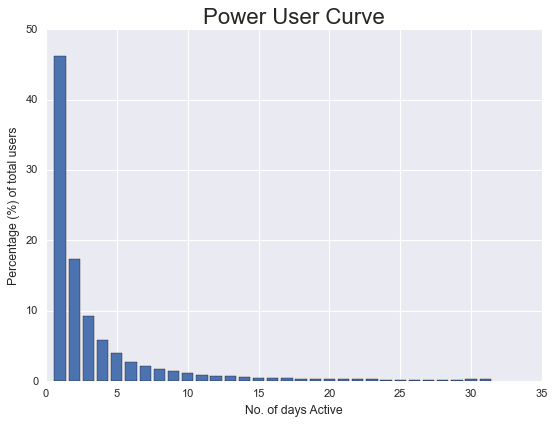

In [93]:
# Plotting the Power User Curve using Matplotlib
plt.bar(num_days.keys(), num_days.values())
plt.xlabel('No. of days Active')
plt.ylabel('Percentage (%) of total users')
plt.title('Power User Curve', fontsize=20)
plt.style.use('seaborn')
plt.show()

** The Key takeaway from this Power User Curve is Most of the users are using the app only 1-2 days a week, therefore indicating low customer engagement.